In [1]:
!pip install tensorflow matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [3]:
dataset=tf.keras.utils.image_dataset_from_directory("dataset",batch_size=32,label_mode='int',image_size=(128,128))

Found 6308 files belonging to 4 classes.


In [4]:
train_size=int(len(dataset)*0.8)
train_ds=dataset.take(train_size)
val_ds=dataset.skip(train_size)

In [5]:
normalizer=layers.Rescaling(1./255)
train_ds=train_ds.map(lambda x,y:(normalizer(x),y))
val_ds=val_ds.map(lambda x,y:(normalizer(x),y))

In [6]:
print(train_ds)

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [7]:
num_classes=len(dataset.class_names)

In [8]:
model= models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPool2D(),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

C:\Users\Anushka\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,validation_data=val_ds,epochs=5)

Epoch 1/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 128s 786ms/step - accuracy: 0.5412 - loss: 1.2797 - val_accuracy: 0.8339 - val_loss: 0.4808
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 126s 792ms/step - accuracy: 0.8329 - loss: 0.4550 - val_accuracy: 0.8826 - val_loss: 0.3450
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 146s 824ms/step - accuracy: 0.9125 - loss: 0.2535 - val_accuracy: 0.8770 - val_loss: 0.3470
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.9485 - loss: 0.1622 - val_accuracy: 0.9121 - val_loss: 0.2485
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.9653 - loss: 0.1118 - val_accuracy: 0.8746 - val_loss: 0.3930


In [11]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

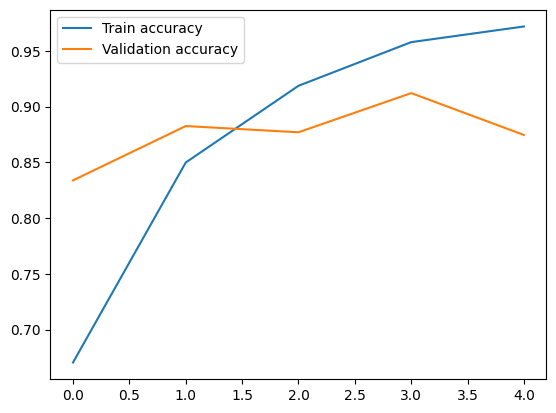

In [12]:
plt.plot(train_acc,label='Train accuracy')
plt.plot(val_acc,label='Validation accuracy')
plt.legend()

In [19]:
def predict_plant_disease(img_path, model, class_names):


    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_batch)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Show the image with prediction
    plt.imshow(img_array)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


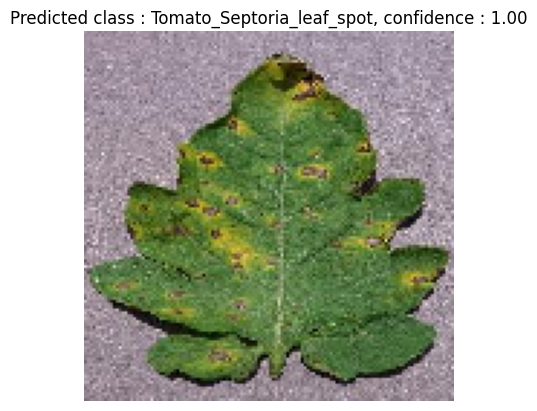

In [27]:
img_path='dataset/Tomato_Septoria_leaf_spot/0a76257e-6a78-459b-8f51-a266805121eb___Matt.S_CG 2527.JPG'
result=predict_plant_disease(img_path,model,dataset.class_names)


In [26]:
def predict_plant_disease(img_path,model,classnames):
    img=image.load_img(path=img_path,target_size=(128,128))
    img_array=image.img_to_array(img)/255.0
    img_batch=np.expand_dims(img_array,axis=0)

    predict=model.predict(img_batch)
    predicted_class=classnames[np.argmax(predict)]
    confidence=np.max(predict)

    plt.imshow(img_array)
    plt.title(f'Predicted class : {predicted_class}, confidence : {confidence:.2f}')
    plt.axis('off')
    